In [28]:
import pandas as pd
from pathlib import PurePosixPath
import timeit
import numpy as np

from visions.core.implementations import visions_complete_set
from visions.core.functional import type_cast, type_inference

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def make_sample_data(n_elems):
    n_elems += n_elems % 2

    df = pd.DataFrame({
        'ip_str': ["127.0.0.1"] * n_elems,
        'float_str': ["1.1", "NAN"] * int(n_elems/2),
        'obj_series': [[1, ""]] * n_elems,
        'path': [PurePosixPath("/home/user/file.txt")] * n_elems,
        'integer': [3] * n_elems,
        'bool_int': [1, 0] * int(n_elems/2),
        'string_date': ["1937-05-06"] * n_elems,
    })
    return df

typeset = visions_complete_set()

In [4]:
def test_func(function):
    def inner(df, typeset):
        def double_inner():
            return function(df, typeset)
        return double_inner
    return inner

inference_test_setup = test_func(type_inference)
cast_test_setup = test_func(type_cast)

In [13]:
df = make_sample_data(1000000)
%timeit type_cast(df, typeset)

6.88 s ± 1.84 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
def time_func(func, n_elems, num_runs=5):
    df = make_sample_data(n_elems)
    test = func(df, typeset)
    return timeit.timeit(test, number=num_runs) / num_runs

In [68]:
df_length = [10, 100, 1000] + list(range(2000, 10000, 1000)) + list(range(10000, 100000, 10000)) +\
            [500000, 1000000]

In [62]:
inference_run_time = [time_func(inference_test_setup, l) for l in df_length]

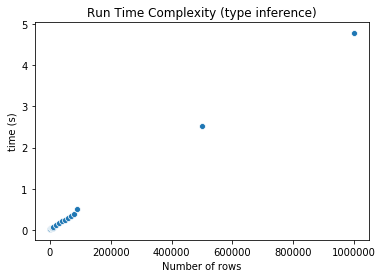

In [67]:
ax = sn.scatterplot(df_length, inference_run_time)
_ = ax.set(xlabel='Number of rows', ylabel='time (s)', title='Run Time Complexity (type inference)')

In [ ]:
cast_run_time = [time_func(cast_test_setup, l) for l in df_length]

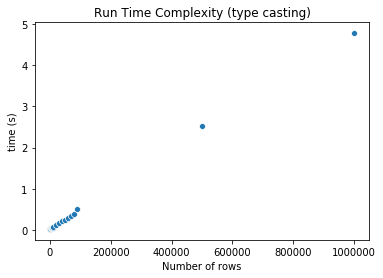

In [70]:
ax = sn.scatterplot(df_length, inference_run_time)
_ = ax.set(xlabel='Number of rows', ylabel='time (s)', title='Run Time Complexity (type casting)')